# Black Friday Data set

## Cleaning and Preparing the Data for model Training 

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

In [2]:
warnings.filterwarnings(action='ignore')

## Reformating the folder path

In [3]:
## Reformating the folder path

path_reformate = lambda x : x.replace("\\", "/")

current_dir = os.getcwd()
current_dir = path_reformate(current_dir)
current_dir

'C:/Users/mayal/Desktop/Data_Science/Git_folders/EDA_Feature_Engineering'

## Loading the Data frames

In [4]:
dataset_path = 'C:/Users/mayal/Desktop/Data_Science/data_sets/Black_friday//*.csv'

def dataframe(folder_path):
    df = {}
    for file in glob.glob(folder_path):
        file = file.replace("\\", "/")
        df_name = file.split("/")[-1].split(".")[0]
        df[df_name]=pd.read_csv(file)
        # print(f"df_{df_name}", end=",")
  
    return df

   
df_test,df_train = dataframe(dataset_path).values()

In [5]:
df_train.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [6]:
df_test.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [7]:
df = df_train.append(df_test)

In [8]:
df.shape

(783667, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
df.describe().style.background_gradient(cmap='Greens')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.000000,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1003028.995753,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1727.266668,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1000001.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1001519.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1003075.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1004478.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1006040.000000,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Dropping user id column = axis 1, rows axis =0


In [11]:
## Dropping user id column = axis 1, rows axis =0

df.drop(columns="User_ID",axis=1, inplace=True)

In [12]:
## Numerical Value 

df.select_dtypes(include=["int64","float64"]).columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

## Handelling the Categorical Features

In [13]:
## Categorical Feature
df.select_dtypes(include=["object"]).head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [14]:
df.select_dtypes(include=["object"]).columns

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

#### ## Conveting Gender column into the Numerical column


In [15]:
## Conveting Gender column into the Numerical column
print([0 if sex =='F' else  1 for sex in df.Gender.head()])

## can be done with multiple approach 
print(df.Gender.head().map({'F':0, 'M':1}))


## Updating the Gender Column with M = 1 and F = 0
df.Gender = df.Gender.map({'F':0, 'M':1})

[0, 0, 0, 0, 1]
0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64


In [16]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


#### ## Working with the Age Feature

In [17]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
pd.get_dummies(df.Age).head()

,0-17,18-25,26-35,36-45,46-50,51-55,55+
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1


##### ## Assigning Ordinal Values manually in the Age Feature

In [19]:
odinal_var = {}
for idx, age in enumerate(sorted(list(df.Age.unique())),1):
    odinal_var[age]=idx
odinal_var

{'0-17': 1,
 '18-25': 2,
 '26-35': 3,
 '36-45': 4,
 '46-50': 5,
 '51-55': 6,
 '55+': 7}

In [20]:
df.Age = df.Age.map(odinal_var)
df.Age.unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

##### Second way of doing it
## Lable encoding Approach assinging the value in the Age Feature

In [21]:
# from sklearn import preprocessing

# lable_encoder = preprocessing.LabelEncoder()
# df.Age = lable_encoder.fit_transform(df.Age)
# df.Age.unique()

In [22]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


#### ##Working with another Categorical Value City_Category 

In [23]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [24]:
## Dropping the First Category 
### If there are three category present in the feature one can be drop and rest two will cover for all three

df_city = pd.get_dummies(df.City_Category,drop_first=True)


In [25]:
## Dropping City_category

df = pd.concat([df,df_city], axis=1)
df.drop(columns='City_Category',axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [26]:
df_city['B'] = df_city['B'].astype(np.int64)
df_city['C'] = df_city['C'].astype(np.int64)
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   B       783667 non-null  int64
 1   C       783667 non-null  int64
dtypes: int64(2)
memory usage: 17.9 MB


#### ##Working with another Categorical Value Stay_In_Current_City_Years 

In [27]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [28]:
## Replacing '4+' to 4

df.Stay_In_Current_City_Years.replace('4+','4',inplace=True)
df.Stay_In_Current_City_Years.unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [29]:
## Convert object into itegers

df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype(np.int64)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          537685 non-null  float64
 8   Product_Category_3          237858 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


## Handling for the missing values

In [31]:
## Purchase column has Null value becase we combine the test data set there was not purchase attributes

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

#### ## Product_Category_2 replacing missing value

In [32]:
## Returns the descrete value
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [33]:
df.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [34]:
df.Product_Category_2.mode()[0]

8.0

In [35]:
df.Product_Category_2 = df.Product_Category_2.fillna(df.Product_Category_2.mode()[0])

In [36]:
df.Product_Category_2.isnull().sum()

0

#### ## Product_Category_3 replacing missing value

In [37]:
df.Product_Category_2.unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [38]:
df.Product_Category_3.value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [39]:
df.Product_Category_3.mode()[0]

16.0

In [40]:
df.Product_Category_3 = df.Product_Category_3.fillna(df.Product_Category_3.mode()[0])
df.Product_Category_3.isnull().sum()

0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(6), object(1), uint8(2)
memory usage: 67.3+ MB


## Visualization 

<Axes: xlabel='Age', ylabel='Purchase'>

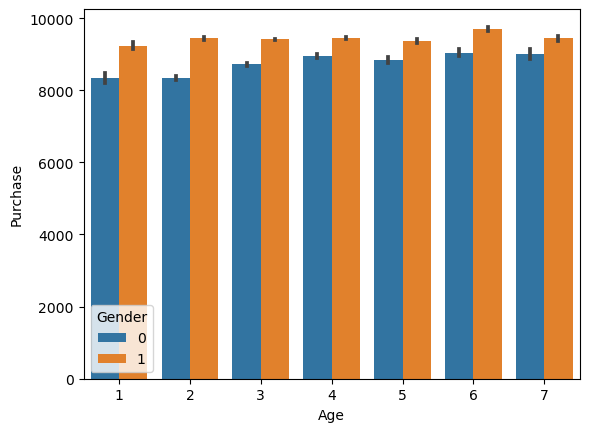

In [42]:
## Visualization of AGE VS PURCHASE with respect of Gender.

sns.barplot(x='Age',y='Purchase',hue = 'Gender', data = df)

## Feature Scaling 

In [43]:
df.drop(columns='Product_ID',inplace=True)

In [44]:
## DATASET FOR PREDICT WITH PURCHASE VALUE IS NULL

df_test = df[df.Purchase.isnull()]
df_test.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [45]:
## DATASET FOR TRAIN AND TEST WITH PURCHASE VALUE IS NOT NULL

df_train = df[~df.Purchase.isnull()]
df_train.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [46]:
X = df_train.drop(columns='Purchase')

In [47]:
y = df_train['Purchase']

In [48]:
X.shape

(550068, 10)

In [49]:
y.shape

(550068,)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)